In [70]:
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

In [71]:
access_token = '410230715-3aP2U5HQQH0Q30cGhlA18LNxTWMy92uYJI4zRsiF'
access_secret = 'u08GW2qZKc6l1hIsMm6qpnigPTwePKIFa8dNjiUcOTY3c'
consumer_key = 'UYSbjVgl9cvQdiDeXUfE43zFx'
consumer_secret = 'kZxuwRznYmwwwK3qhsgkPZ9KFNN2URVZg7AtshlxCePGMeBFxP'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [72]:
extractor = api
# We create a tweet list as follows:
honeywell = extractor.user_timeline(screen_name="honeywell",since = '2018-12-01',until = '2018-12-31',count = 200 ,max_id = '1079784014830030848')
synch = extractor.user_timeline(screen_name="synchrony",since = '2018-12-01',until = '2018-12-31', count=200,max_id = '1079784014830030848')
m_3 = extractor.user_timeline(screen_name="3m",since = '2018-12-01',until = '2018-12-31', count=200,max_id = '1079784014830030848')
bayer = extractor.user_timeline(screen_name="bayer",since = '2018-12-01',until = '2018-12-31', count=200,max_id = '1079784014830030848')

In [73]:
honeywell_df = pd.DataFrame(data=[tweet.text for tweet in honeywell],columns = ['Tweets'])
synch_df = pd.DataFrame(data=[tweet.text for tweet in synch],columns = ['Tweets'])
m_3_df = pd.DataFrame(data=[tweet.text for tweet in m_3],columns = ['Tweets'])
bayer_df = pd.DataFrame(data=[tweet.text for tweet in bayer],columns = ['Tweets'])

In [74]:
honeywell_df['len']  = np.array([len(tweet.text) for tweet in honeywell])
honeywell_df['ID']   = np.array([tweet.id for tweet in honeywell])
honeywell_df['Date'] = np.array([tweet.created_at for tweet in honeywell])
honeywell_df['Source'] = np.array([tweet.source for tweet in honeywell])
honeywell_df['Likes']  = np.array([tweet.favorite_count for tweet in honeywell])
honeywell_df['RTs']    = np.array([tweet.retweet_count for tweet in honeywell])

synch_df['len']  = np.array([len(tweet.text) for tweet in synch])
synch_df['ID']   = np.array([tweet.id for tweet in synch])
synch_df['Date'] = np.array([tweet.created_at for tweet in synch])
synch_df['Source'] = np.array([tweet.source for tweet in synch])
synch_df['Likes']  = np.array([tweet.favorite_count for tweet in synch])
synch_df['RTs']    = np.array([tweet.retweet_count for tweet in synch])

m_3_df['len']  = np.array([len(tweet.text) for tweet in m_3])
m_3_df['ID']   = np.array([tweet.id for tweet in m_3])
m_3_df['Date'] = np.array([tweet.created_at for tweet in m_3])
m_3_df['Source'] = np.array([tweet.source for tweet in m_3])
m_3_df['Likes']  = np.array([tweet.favorite_count for tweet in m_3])
m_3_df['RTs']    = np.array([tweet.retweet_count for tweet in m_3])

bayer_df['len']  = np.array([len(tweet.text) for tweet in bayer])
bayer_df['ID']   = np.array([tweet.id for tweet in bayer])
bayer_df['Date'] = np.array([tweet.created_at for tweet in bayer])
bayer_df['Source'] = np.array([tweet.source for tweet in bayer])
bayer_df['Likes']  = np.array([tweet.favorite_count for tweet in bayer])
bayer_df['RTs']    = np.array([tweet.retweet_count for tweet in bayer])

In [75]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [76]:
honeywell_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in honeywell_df['Tweets'] ])
pos_tweets_h = [ tweet for index, tweet in enumerate(honeywell_df['Tweets']) if honeywell_df['SA'][index] > 0]
neu_tweets_h = [ tweet for index, tweet in enumerate(honeywell_df['Tweets']) if honeywell_df['SA'][index] == 0]
neg_tweets_h = [ tweet for index, tweet in enumerate(honeywell_df['Tweets']) if honeywell_df['SA'][index] < 0]

print("Percentage of positive tweets by Honeywell: {}%".format(len(pos_tweets_h)*100/len(honeywell_df['Tweets'])))
print("Percentage of neutral tweets by Honeywell: {}%".format(len(neu_tweets_h)*100/len(honeywell_df['Tweets'])))
print("Percentage of negative tweets by Honeywell: {}%".format(len(neg_tweets_h)*100/len(honeywell_df['Tweets'])))

Percentage of positive tweets by Honeywell: 64.0%
Percentage of neutral tweets by Honeywell: 29.0%
Percentage of negative tweets by Honeywell: 7.0%


In [77]:
synch_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in synch_df['Tweets'] ])
pos_tweets_s = [ tweet for index, tweet in enumerate(synch_df['Tweets']) if synch_df['SA'][index] > 0]
neu_tweets_s = [ tweet for index, tweet in enumerate(synch_df['Tweets']) if synch_df['SA'][index] == 0]
neg_tweets_s = [ tweet for index, tweet in enumerate(synch_df['Tweets']) if synch_df['SA'][index] < 0]

print("Percentage of positive tweets by Synchrony: {}%".format(len(pos_tweets_s)*100/len(synch_df['Tweets'])))
print("Percentage of neutral tweets by Synchrony: {}%".format(len(neu_tweets_s)*100/len(synch_df['Tweets'])))
print("Percentage of negative tweets by Synchrony: {}%".format(len(neg_tweets_s)*100/len(synch_df['Tweets'])))

Percentage of positive tweets by Synchrony: 49.0%
Percentage of neutral tweets by Synchrony: 45.5%
Percentage of negative tweets by Synchrony: 5.5%


In [78]:
m_3_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in m_3_df['Tweets'] ])
pos_tweets_m = [ tweet for index, tweet in enumerate(m_3_df['Tweets']) if m_3_df['SA'][index] > 0]
neu_tweets_m = [ tweet for index, tweet in enumerate(m_3_df['Tweets']) if m_3_df['SA'][index] == 0]
neg_tweets_m = [ tweet for index, tweet in enumerate(m_3_df['Tweets']) if m_3_df['SA'][index] < 0]

print("Percentage of positive tweets by 3M: {}%".format(len(pos_tweets_m)*100/len(m_3_df['Tweets'])))
print("Percentage of neutral tweets by 3M: {}%".format(len(neu_tweets_m)*100/len(m_3_df['Tweets'])))
print("Percentage of negative tweets by 3M: {}%".format(len(neg_tweets_m)*100/len(m_3_df['Tweets'])))

Percentage of positive tweets by 3M: 43.0%
Percentage of neutral tweets by 3M: 37.0%
Percentage of negative tweets by 3M: 20.0%


In [79]:
bayer_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in bayer_df['Tweets'] ])
pos_tweets_b = [ tweet for index, tweet in enumerate(bayer_df['Tweets']) if bayer_df['SA'][index] > 0]
neu_tweets_b = [ tweet for index, tweet in enumerate(bayer_df['Tweets']) if bayer_df['SA'][index] == 0]
neg_tweets_b = [ tweet for index, tweet in enumerate(bayer_df['Tweets']) if bayer_df['SA'][index] < 0]

print("Percentage of positive tweets by bayer: {}%".format(len(pos_tweets_b)*100/len(bayer_df['Tweets'])))
print("Percentage of neutral tweets by bayer: {}%".format(len(neu_tweets_b)*100/len(bayer_df['Tweets'])))
print("Percentage de negative tweets by bayer: {}%".format(len(neg_tweets_b)*100/len(bayer_df['Tweets'])))

Percentage of positive tweets by bayer: 27.5%
Percentage of neutral tweets by bayer: 69.0%
Percentage de negative tweets by bayer: 3.5%


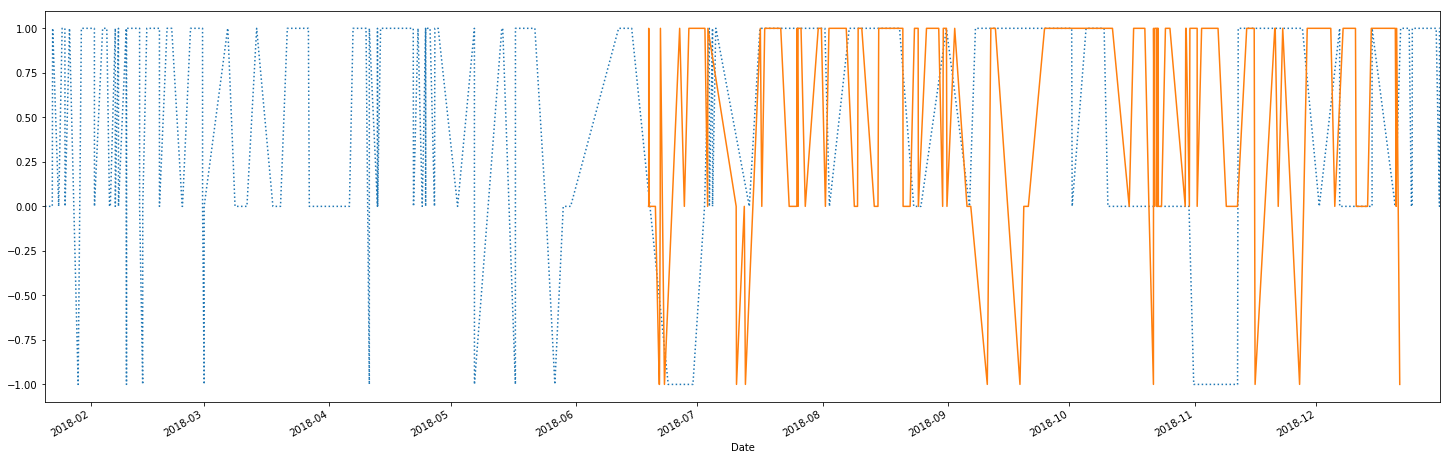

0      2018-12-31
1      2018-12-31
2      2018-12-31
3      2018-12-30
4      2018-12-30
5      2018-12-30
6      2018-12-29
7      2018-12-29
8      2018-12-28
9      2018-12-28
10     2018-12-27
11     2018-12-27
12     2018-12-27
13     2018-12-27
14     2018-12-27
15     2018-12-24
16     2018-12-24
17     2018-12-24
18     2018-12-24
19     2018-12-24
20     2018-12-24
21     2018-12-24
22     2018-12-21
23     2018-12-20
24     2018-12-14
25     2018-12-14
26     2018-12-11
27     2018-12-06
28     2018-12-06
29     2018-12-06
          ...    
170    2018-02-10
171    2018-02-09
172    2018-02-09
173    2018-02-09
174    2018-02-07
175    2018-02-07
176    2018-02-07
177    2018-02-07
178    2018-02-05
179    2018-02-05
180    2018-02-04
181    2018-02-03
182    2018-02-01
183    2018-02-01
184    2018-02-01
185    2018-01-31
186    2018-01-29
187    2018-01-29
188    2018-01-28
189    2018-01-26
190    2018-01-25
191    2018-01-25
192    2018-01-24
193    2018-01-24
194    201

In [80]:
h_t = pd.Series(data = honeywell_df['SA'].values,index = honeywell_df['Date'])
s_t = pd.Series(data = synch_df['SA'].values,index = synch_df['Date'])
m_t = pd.Series(data = m_3_df['SA'].values,index = m_3_df['Date'])
b_t = pd.Series(data = bayer_df['SA'].values,index = bayer_df['Date'])
#ax,fig = plt.subplots(figsize=(16,4))
h_t.plot(figsize=(25,8),linestyle = ':')
s_t.plot(figsize=(25,8),linestyle = '-')


plt.show()

honeywell_df.Date.map(lambda x: x.strftime('%Y-%m-%d'))


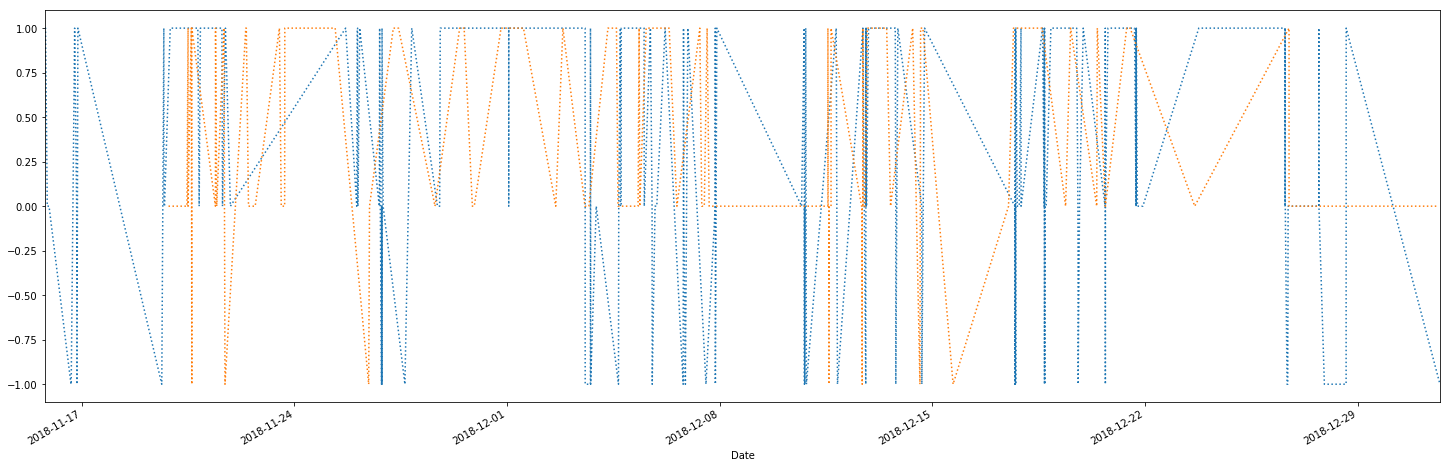

In [81]:
m_t.plot(figsize=(25,8),linestyle = ':')
b_t.plot(figsize=(25,8),linestyle = ':')
plt.show()

In [82]:
dict(honeywell_df['SA'].value_counts())

{-1: 14, 0: 58, 1: 128}

In [241]:

all_df = [honeywell_df, synch_df,m_3_df,bayer_df]
df_labels = ['Honeywell','Synchrony Financial', '3M', 'Bayer']
mod_df=[]
for df in all_df:
    df2=df.copy()
    df2['Date']=df2.Date.map(lambda x: x.strftime('%Y-%m-%d'))
    df2['Date']=pd.to_datetime(df2['Date'])
    mod_df.append(df2)


1112 1113


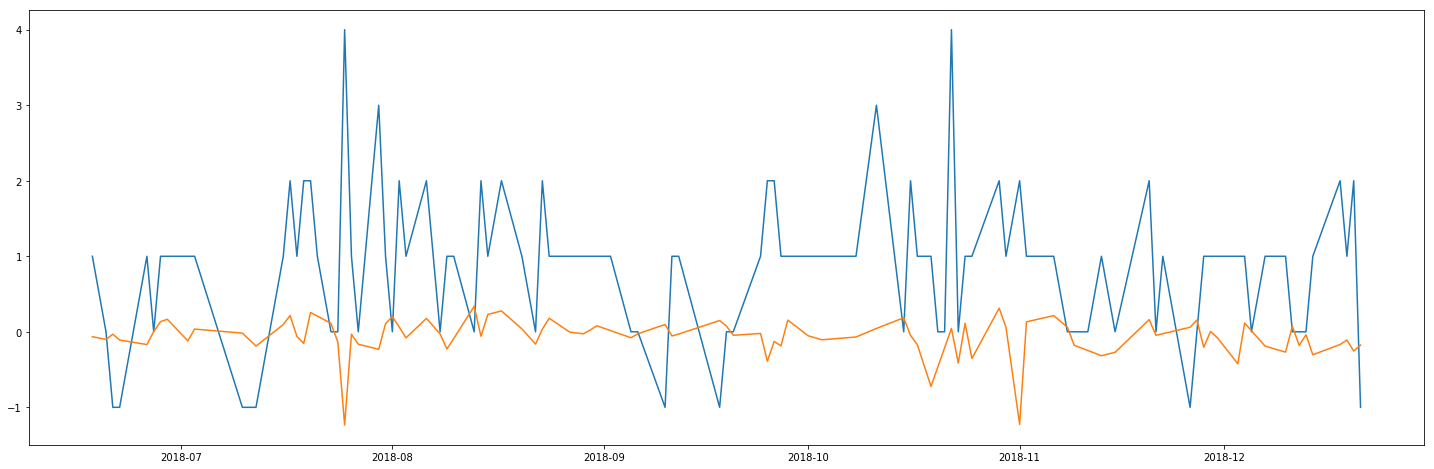

In [260]:
total_sentiment=pd.DataFrame(mod_df[1].groupby('Date').sum())
total_sentiment['Date']=pd.to_datetime(total_sentiment.index)
synfin_data= pd.read_csv('modeling/Data/Data Given/SYF.csv')
synfin_data=synfin_data.dropna(axis=0)
synfin_data['Date'] = pd.to_datetime(synfin_data['Date']) 


def daily_return(close):
    returns = []
#    for i in range(0, len(close)-1):
    for i in range(close.index[0],close.index[-1]):
        today = close[i+1]
        yesterday = close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns


returns= daily_return(synfin_data['Close'])
print(len(returns),len(synfin_data))
returns_df=pd.DataFrame({"Date":list(synfin_data['Date'][:-1]),'returns':returns})

relevant_returns=returns_df.loc[returns_df['Date'].isin(list(total_sentiment['Date']))]
relevant_returns= relevant_returns.sort_values(by='Date')
total_sentiment=total_sentiment.sort_values(by='Date')

sa_corr= pd.DataFrame({"Date":total_sentiment['Date'],'SA':total_sentiment['SA'], })
sa_corr['returns'] = relevant_returns['returns']

plt.figure(figsize=(25,8))
plt.plot(total_sentiment['Date'],total_sentiment['SA'])
plt.plot(relevant_returns['Date'],relevant_returns['returns']*12)

plt.show()


In [233]:
synfin_data

Date       Open       High        Low      Close  Adj Close  \
0    2014-07-31  23.000000  24.000000  22.600000  23.000000  21.732750   
1    2014-08-01  22.900000  23.000000  22.670000  23.000000  21.732750   
2    2014-08-04  23.100000  23.129999  22.900000  23.000000  21.732750   
3    2014-08-05  22.990000  23.010000  22.670000  23.000000  21.732750   
4    2014-08-06  22.799999  22.980000  22.670000  22.980000  21.713850   
5    2014-08-07  22.889999  23.000000  22.799999  22.930000  21.666607   
6    2014-08-08  22.930000  23.030001  22.799999  22.950001  21.685505   
7    2014-08-11  22.900000  22.930000  22.799999  22.930000  21.666607   
8    2014-08-12  22.889999  23.000000  22.830000  23.000000  21.732750   
9    2014-08-13  23.000000  23.230000  22.879999  23.180000  21.902832   
10   2014-08-14  23.200001  23.219999  22.950001  23.010000  21.742197   
11   2014-08-15  23.020000  23.080000  23.000000  23.000000  21.732750   
12   2014-08-18  23.059999  23.170000  23.020000  23.170000  21.893381   
13   2014-08-19  23.200001  24.434999  23.200001  24.410000  23.065060   
14   2014-08-20  24.299999  25.590000  24.260000  25.190001  23.802086   
15   2014-08-21  25.469999  25.520000  24.920000  25.389999  23.991062   
16   2014-08-22  25.250000  25.430000  25.100000  25.360001  23.962719   
17   2014-08-25  25.370001  25.400000  24.879999  25.120001  23.735945   
18   2014-08-26  25.000000  25.100000  24.940001  25.049999  23.669796   
19   2014-08-27  25.000000  25.540001  24.950001  25.469999  24.066660   
20   2014-08-28  25.400000  25.840000  25.309999  25.690001  24.274538   
21   2014-08-29  25.809999  25.940001  25.450001  25.790001  24.369026   
22   2014-09-02  25.700001  25.900000  25.520000  25.790001  24.369026   
23   2014-09-03  25.990000  25.997000  25.629999  25.790001  24.369026   
24   2014-09-04  25.530001  25.750000  25.510000  25.700001  24.283985   
25   2014-09-05  25.700001  26.020000  25.620001  25.770000  24.350128   
26   2014-09-08  25.820000  25.980000  24.620001  24.840000  23.471371   
27   2014-09-09  25.299999  25.600000  24.700001  25.040001  23.660347   
28   2014-09-10  25.190001  25.305000  24.690001  24.700001  23.339085   
29   2014-09-11  24.750000  25.020000  24.629999  24.650000  23.291836   
...         ...        ...        ...        ...        ...        ...   
1083 2018-11-15  26.645000  26.650000  25.930000  26.510000  26.324678   
1084 2018-11-16  26.350000  26.389999  25.440001  25.910000  25.728872   
1085 2018-11-19  25.940001  26.090000  25.200001  25.530001  25.351528   
1086 2018-11-20  25.290001  25.820000  25.059999  25.320000  25.142996   
1087 2018-11-21  25.400000  26.059999  25.330000  25.660000  25.480619   
1088 2018-11-23  25.530001  25.830000  25.360001  25.559999  25.381317   
1089 2018-11-26  25.920000  26.150000  25.809999  25.950001  25.768593   
1090 2018-11-27  25.760000  26.129999  25.719999  26.080000  25.897684   
1091 2018-11-28  26.059999  26.459999  25.945000  26.420000  26.235306   
1092 2018-11-29  26.230000  26.403999  25.950001  25.969999  25.788452   
1093 2018-11-30  26.000000  26.040001  25.725000  25.980000  25.798382   
1094 2018-12-03  26.230000  26.415001  25.690001  25.809999  25.629570   
1095 2018-12-04  25.660000  25.850000  24.690001  24.900000  24.725931   
1096 2018-12-06  24.530001  25.160000  24.510000  25.139999  24.964254   
1097 2018-12-07  25.320000  25.930000  25.209999  25.360001  25.182716   
1098 2018-12-10  25.299999  25.410000  24.299999  24.959999  24.785511   
1099 2018-12-11  25.309999  25.500000  24.180000  24.400000  24.229427   
1100 2018-12-12  24.680000  25.070000  24.469999  24.549999  24.378378   
1101 2018-12-13  24.620001  24.730000  24.070000  24.180000  24.010965   
1102 2018-12-14  23.930000  24.670000  23.809999  24.100000  23.931524   
1103 2018-12-17  24.000000  24.146000  23.360001  23.490000  23.325788   
1104 2018-12-18  23.639999  23.950001  23.320000  23.530001  23.365511   
1105 2018-12-19